<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/2_BreamAndSmelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sample Dataset
본 예제 **2_BreamAndSmelt.ipynb**에서는 kaggle에 공개된 **fish-market**과 Github Gist에서 rickiepark이 공유하는 **bream_list**를 sample dataset으로 사용합니다.  
* ~~[Download sample dataset: fish-market](https://www.kaggle.com/aungpyaeap/fish-market) <- 이거 데이터셋 사라져서 다른 사람이 올린 것 찾아볼 것.~~  
* [Download sample dataset: bream_list](https://gist.github.com/rickiepark/b37d04a95a42ef6757e4a99214d61697)
* [Download sample dataset: smelt_list](https://gist.github.com/rickiepark/1e89fe2a9d4ad92bc9f073163c9a37a7)



할 일: pyplot에서 지원하는 여러 plot들 예시 사진과 함께 짧게 설명하기(p.48참조)

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

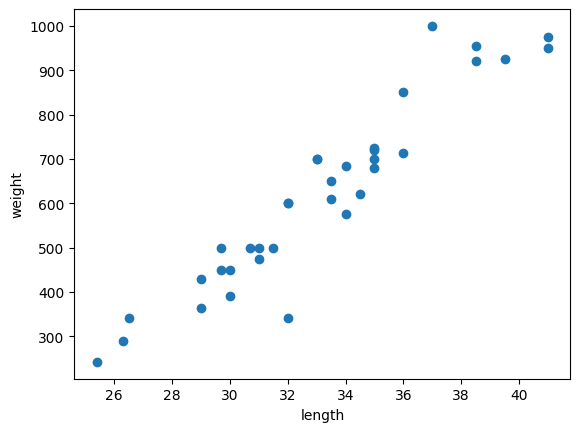

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight) # 이 코드만으로 scatter plot 표현 가능
plt.xlabel('length') # 단순히 x axis의 label을 추가하는 것
plt.ylabel('weight') # 단순히 y axis의 label을 추가하는 것
plt.show()

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

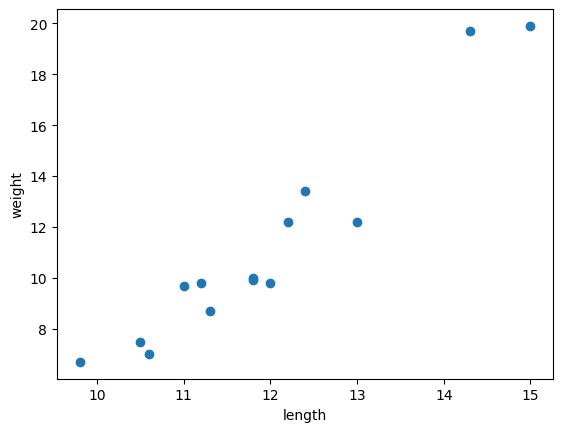

In [ ]:
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

또한 위 데이터를 table 형식으로 다음과 같이 표현하면 비교적 이해가 편하다.  

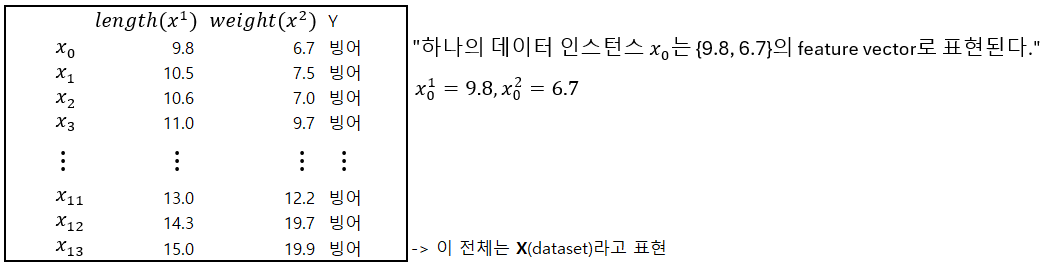

## 2개의 scatter plot을 그리는 방법
기본적으로 `plt.show()`는 명령 실행 전까지 설정된 plt 값을 기반으로 화면에 출력하고, 이전에 설정된 plt 값을 모두 초기화한다.  
따라서 `plt.show()` 이전에 bream_list와 smelt_list를 모두 plt에 설정하면 두 개의 scatter plot을 동시에 출력할 수 있다.

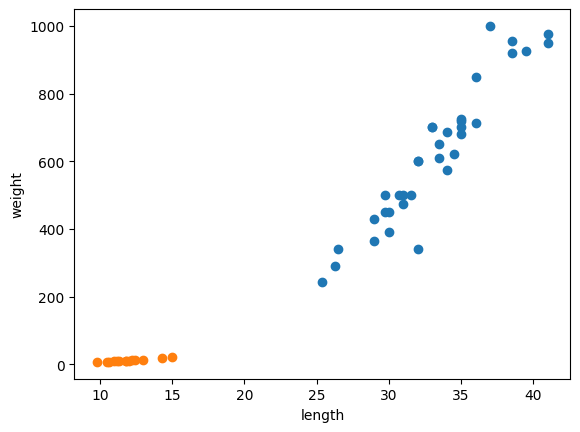

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
plt.show() # 위 cell에서 이미 plt.show()를 함으로써 plt 설정 값들이 초기화되었다.
           # 따라서 해당 cell의 plt.show()는 실행해도 아무런 plot도 출력되지 않는다.

# 첫 번째 머신러닝 프로그램 with K-NN Algorithm
가장 간단하고 이해하기 쉬운 **k-Nearest Neighbors; K-NN; k-최근접 이웃** Algorithm을 사용하여 bream과 smelt를 구분해내기로 한다.

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 난 아래 방식을 선호하지만, scikit-learn에서는 tuple이 아니고 two dim list로 하는 것이 연산에 더 좋음
# fish_data = [ t for t in zip(length, weight) ]
fish_data = [ [w, l] for w, l in zip(length, weight) ]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [ ]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)  
* * *
`fit(X, y)`  
Fit the k-nearest neighbors classifier from the training dataset.  
&emsp;**Parameters:**  
&emsp;&emsp;**X: Training data.**  
&emsp;&emsp;**y: Target values.**
* * *
`score(X, y, sample_weight=None)`  
Return the mean accuracy on the given test data and lables.  
In multi-label classification, this is the subset accuracy which is a harsh metirc since you require for each sample that ecah label set be corrrectly predicted.  
&emsp;**Paramters:**  
&emsp;&emsp;**X: Test samples.**  
&emsp;&emsp;**y: True labels for `x`.**  
&emsp;&emsp;**sample_weight: Sample weigths.**  
&emsp;**Returns:**  
&emsp;&emsp;**score: float**  
&emsp;&emsp;&emsp;Mean accuracy of `self.predict(x)` w.r.t. `y`.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # scikit-learn에서 K-NN Algorithm을 구현한 클래스인 KNeighborsClassfier를 import


kn = KNeighborsClassifier() # class 객체 생성

kn.fit(fish_data, fish_target) # 주어진 Traning data와 Target values로 fitting을 한다. 리턴값은 Model.

kn.score(fish_data, fish_target) # Model에 Test data와 True labels를 넣어서 accurancy를 측정.

1.0